0    -32.0
1    -30.0
2    -28.0
3    -26.0
4    -24.0
5    -22.0
6    -20.0
7    -18.0
8    -16.0
9    -14.0
10   -12.0
11   -10.0
12    -8.0
13    -6.0
14    -4.0
15    -2.0
16     1.0
17     3.0
18     5.0
19     7.0
20     9.0
21    11.0
22    13.0
23    15.0
24    17.0
25    19.0
26    21.0
27    23.0
28    25.0
29    27.0
30    29.0
31    31.0
Name: m number.2, dtype: float64


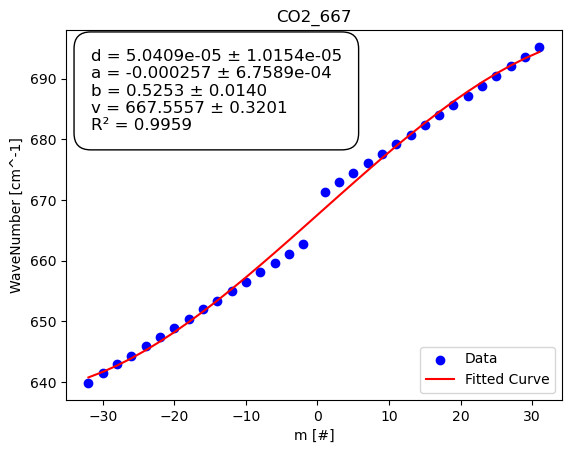

In [2]:
## this code is for the fitting of the data of CO2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from Excel
file_path = 'CO2.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path, sheet_name="2340")

# Extract x (column 1) and y (column 2) from the even-numbered rows
x_data = data.iloc[0:32, 10]  # Column 0 (zero-indexed)
y_data = data.iloc[0:32, 11]  # Column 1 (zero-indexed)
print(x_data)
# Define the custom function to fit: -4dx^3 - ax^2 + (2b-2a)x + v
def custom_function(x, d, a, b, v):
    fitting = -4 * d * x**3 - a * x**2 + (2*b-2*a) * x + v
    return fitting

# Fit the data using curve_fit
params, covariance = curve_fit(custom_function, x_data, y_data)

# Extract the fitted parameters
d_fit, a_fit, b_fit, v_fit = params

# Calculate parameter errors (standard deviations)
param_errors = np.sqrt(np.diag(covariance))
d_error, a_error, b_error, v_error = param_errors

# Calculate the fitted values
y_fit = custom_function(x_data, *params)

# Calculate R-squared (R^2)
residuals = y_data - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')

# Annotate the plot with the fitted parameters and R-squared
plt.text(0.05, 0.95, f'd = {d_fit:.4e} ± {d_error:.4e}\n'
                     f'a = {a_fit:.6f} ± {a_error:.4e}\n'
                     f'b = {b_fit:.4f} ± {b_error:.4f}\n'
                     f'v = {v_fit:.4f} ± {v_error:.4f}\n'
                     f'R² = {r_squared:.4f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.legend()
plt.xlabel('m [#]')
plt.ylabel('WaveNumber [cm^-1]')
plt.title('CO2_667')
plt.show()

